# Dynamical Decoupling (DD) Simulation

Ideal system:  **$e^{-iZt}$** \
Noisy system: **$e^{-i(Z+\lambda{X})t}$**
#### Want to prove: 
**$e^{-i(Z+\lambda{X})t}Ze^{-i(Z+\lambda{X})t}Z \approx e^{-2iZt}$** 

### Libraries and Matrix declaration

In [1]:
import numpy as np
import scipy
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [2]:
X, Z, I = np.matrix([[0, 1],[1, 0]]), np.matrix([[1, 0],[0, -1]]), np.matrix([[1, 0],[0, 1]])

### Setting the value of $\lambda$

In [3]:
lambda_value = 0.1

In [19]:
t=0
time = []
epsilon = []
for t in range (0,100,1):
    t = t/10
    A = expm(-1j*(Z+lambda_value*X)*t)*Z*expm(-1j*(Z+lambda_value*X)*t)*Z
    B = expm(-2j*Z*t)
    
    difference = A - B
    eigenvalues,_ = np.linalg.eig(difference)
    max_eigenvalue = eigenvalues.max()
    epsilon.append(max_eigenvalue)
    #print(epsilon)
    #print(A)
    #print(B)
    time.append(t)


## Graph t vs $\epsilon$

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


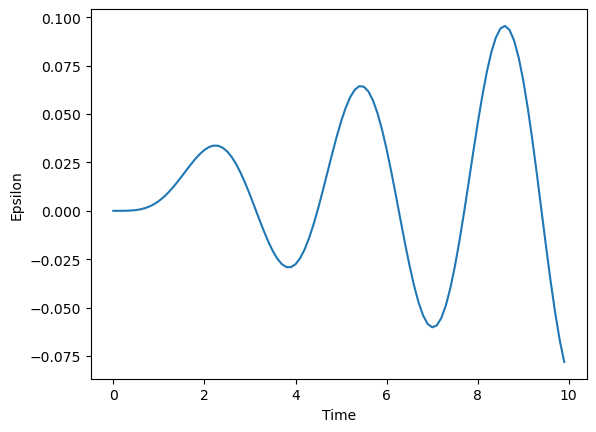

In [5]:
plt.plot(time,epsilon)
plt.xlabel('Time')
plt.ylabel('Epsilon')
plt.show()